In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler


%store -r X_features_full
%store -r X_features_poly_full
%store -r y_labels_full


%store -r totaldf_full
totaldf = totaldf_full
X_features = X_features_full
X_features_poly = X_features_poly_full
y_labels = y_labels_full

In [2]:
svm_lin_reg = joblib.load("svm_lin_reg.pkl")
optimized_svm_regressor = joblib.load("optimized_svm_regressor.pkl")
_randomly_optimized_svm_regressor = joblib.load("_randomly_optimized_svm_regressor.pkl")
svm_poly_reg = joblib.load("svm_poly_reg.pkl")
svm_rbf_reg = joblib.load("svm_rbf_reg.pkl")
svm_rbf_poly_reg = joblib.load("svm_rbf_poly_reg.pkl")
svm_poly2_reg = joblib.load('svm_poly2_reg.pkl')
svm_poly3_reg = joblib.load('svm_poly3_reg.pkl')

In [3]:
totaldf.insert(7,'lin svm μ', totaldf.μob*np.exp(svm_lin_reg.predict(X_features[2])))
totaldf.insert(8,'optimized svm μ', totaldf.μob*np.exp(svm_poly2_reg.predict(X_features[2])))
totaldf.insert(9,'random optimized svm μ', totaldf.μob*np.exp(svm_poly3_reg.predict(X_features[2])))
totaldf.insert(10,'poly features lin svm μ', totaldf.μob*np.exp(svm_poly_reg.predict(X_features_poly[2])))
totaldf.insert(11,'poly lasso μ', totaldf.μob*np.exp(svm_rbf_reg.predict(X_features[2])))
totaldf.insert(12,'svm rbf poly  μ', totaldf.μob*np.exp(svm_rbf_poly_reg.predict(X_features_poly[2])))
totaldf.insert(13,'svm poly reg 2 μ', totaldf.μob*np.exp(svm_poly2_reg.predict(X_features[2])))
totaldf.insert(14,'svm poly reg 3 μ', totaldf.μob*np.exp(svm_poly3_reg.predict(X_features[2])))


In [4]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,lin svm μ,optimized svm μ,random optimized svm μ,poly features lin svm μ,poly lasso μ,svm rbf poly μ,svm poly reg 2 μ,svm poly reg 3 μ,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,0.996856,0.997768,0.999183,1.007137,0.999840,0.999555,0.997768,0.999183,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,1.018619,1.027097,1.050063,1.025288,1.011174,1.010963,1.027097,1.050063,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,1.033466,1.042248,1.072546,1.038230,1.024466,1.024171,1.042248,1.072546,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,1.047045,1.053762,1.085687,1.050392,1.037864,1.037288,1.053762,1.085687,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,1.060053,1.063407,1.093142,1.062288,1.051399,1.050557,1.063407,1.093142,336.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3164.663871,42.548239,0.139564,0.145021,0.137822,0.139282,0.146424,0.146972,0.145021,0.137822,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3164.663871,42.548239,0.140394,0.146546,0.138218,0.140091,0.147788,0.148418,0.146546,0.138218,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3164.663871,42.548239,0.141224,0.148121,0.138698,0.140904,0.149144,0.149860,0.148121,0.138698,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3164.663871,42.548239,0.142055,0.149747,0.139268,0.141723,0.150497,0.151301,0.149747,0.139268,365.928


In [5]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(8):
        average_error.append(np.average((a.iloc[:,i+7]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+7]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+7]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+7]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['linear svm',"optimized svm",'random svm','linear svm poly features','rbf svm','rbf svm poly features','polynomial svm order 2 ','polynomial svm order 3'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-0.946213,5.170229,3.339567,4.058803
optimized svm,-0.826215,8.426427,5.037591,6.805144
random svm,-0.259810,7.310232,4.499501,5.767277
linear svm poly features,-0.741697,5.131998,3.381488,3.931038
rbf svm,-0.542421,4.574709,2.844861,3.623389
rbf svm poly features,-0.516364,4.563650,2.816865,3.627507
polynomial svm order 2,-0.826215,8.426427,5.037591,6.805144
polynomial svm order 3,-0.259810,7.310232,4.499501,5.767277


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-0.395326,4.231344,2.795218,4.185708
optimized svm,0.152686,5.196245,3.566781,6.530342
random svm,0.473092,6.284862,3.786370,5.958540
linear svm poly features,-0.277023,4.255440,2.883554,4.176794
rbf svm,0.219070,3.414660,2.279390,3.909251
rbf svm poly features,0.278303,3.370836,2.254066,3.842297
polynomial svm order 2,0.152686,5.196245,3.566781,6.530342
polynomial svm order 3,0.473092,6.284862,3.786370,5.958540


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-0.507377,6.000821,3.786461,81.303534
optimized svm,-5.360091,8.429941,6.812874,111.875168
random svm,-2.519341,7.285767,5.250697,97.375054
linear svm poly features,-0.261122,6.019221,3.842522,80.556211
rbf svm,-2.232891,6.071656,3.978437,91.462683
rbf svm poly features,-2.290673,6.105979,4.002710,91.939779
polynomial svm order 2,-5.360091,8.429941,6.812874,111.875168
polynomial svm order 3,-2.519341,7.285767,5.250697,97.375054


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-1.665630,4.651044,3.024640,142.328114
optimized svm,-2.542535,8.125081,5.832683,279.403699
random svm,-1.763669,6.177961,4.470793,156.136227
linear svm poly features,-1.278182,4.681678,3.058055,135.828254
rbf svm,-1.693639,4.750648,3.023322,148.202694
rbf svm poly features,-1.675788,4.713486,2.937448,146.118955
polynomial svm order 2,-2.542535,8.125081,5.832683,279.403699
polynomial svm order 3,-1.763669,6.177961,4.470793,156.136227


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear svm,-9.411922,5.995697,9.411922,1537.059164
optimized svm,13.875483,18.965462,14.428345,3613.314160
random svm,5.143708,14.837334,10.638399,2467.025916
linear svm poly features,-8.647627,5.732108,8.738803,1428.784041
rbf svm,0.535865,5.876017,4.324925,904.154962
rbf svm poly features,0.563249,5.715137,4.115633,896.185842
polynomial svm order 2,13.875483,18.965462,14.428345,3613.314160
polynomial svm order 3,5.143708,14.837334,10.638399,2467.025916


In [10]:
def UndersatErrorPlot(a):
    models =  ['linear svm',"optimized svm",'random svm','linear svm poly features','rbf svm','rbf svm poly features','polynomial svm order 2 ','polynomial svm order 3']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+7]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.ylabel
  

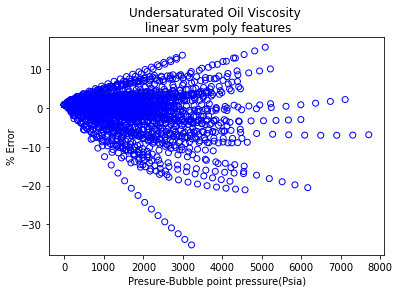

In [11]:
UndersatErrorPlot('linear svm poly features')

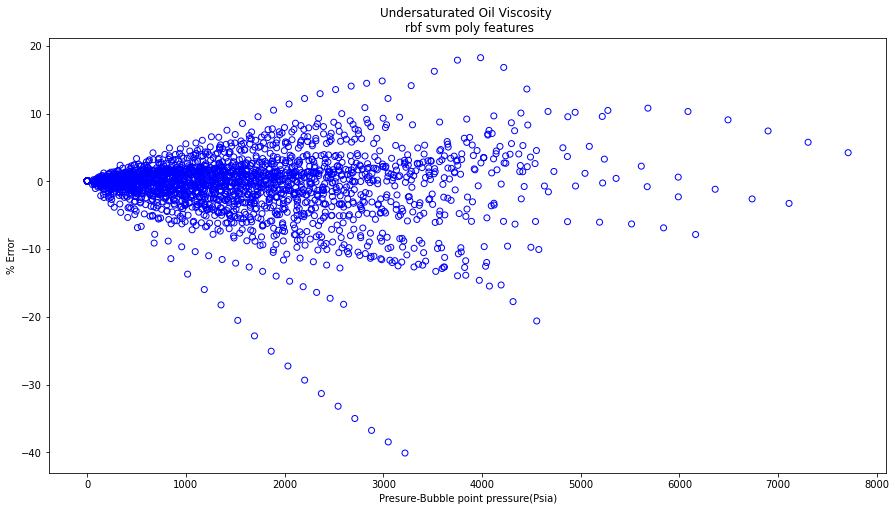

In [12]:
UndersatErrorPlot('rbf svm poly features')

In [13]:
def UndersatViscPlot(a):
    models =  ['linear svm',"optimized svm",'random svm','linear svm poly features','rbf svm','rbf svm poly features','polynomial svm order 2 ','polynomial svm order 3']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+7],facecolors ='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')

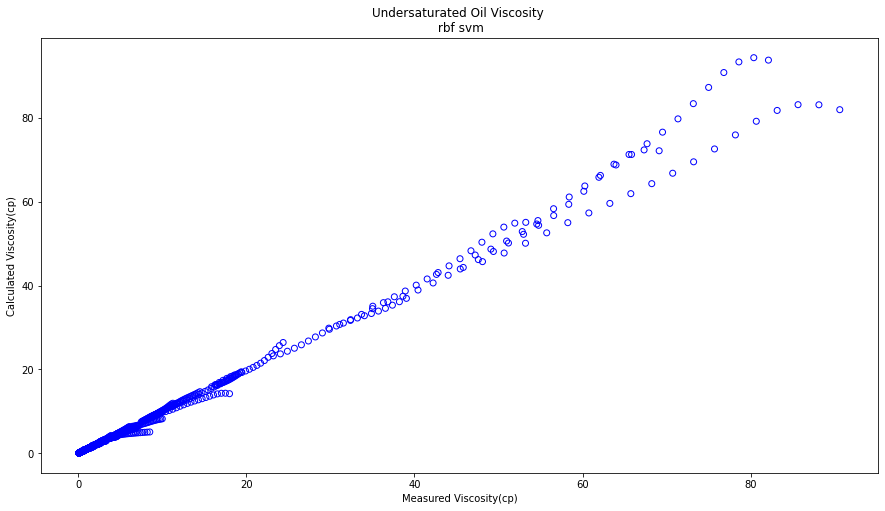

In [14]:
UndersatViscPlot('rbf svm')

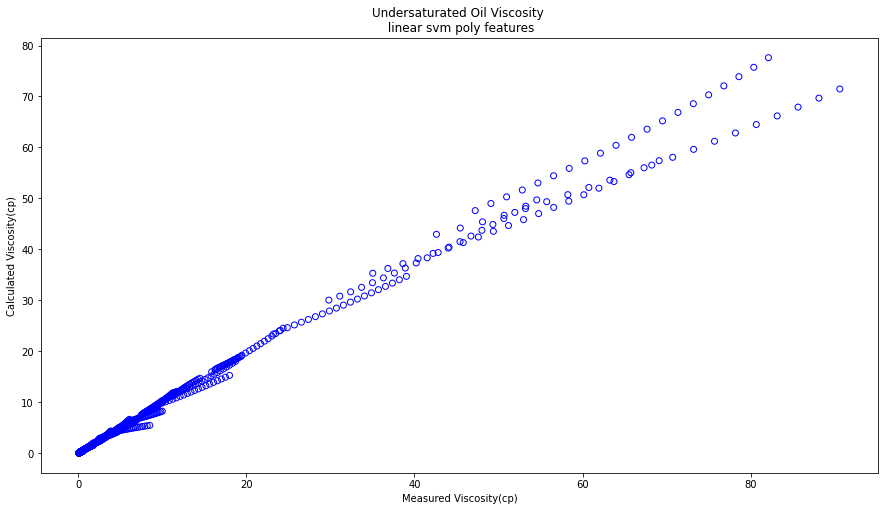

In [15]:
UndersatViscPlot('linear svm poly features')